# **Week - 2: Regression**

## **Import Dependencies**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import kaggle
import requests

import warnings
warnings.filterwarnings('ignore')

### ****Download the dataset****

In [2]:
# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('CooperUnion/cardataset', unzip=True)

# kaggle.api.dataset_metadata('CooperUnion/cardataset', path='metadata')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## ****Exploratory Data Analysis****

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in df.columns:
    print(f"For column {col}: {df[col].unique()[:5]} \n")

For column make: ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler'] 

For column model: ['1 Series M' '1 Series' '100' '124 Spider' '190-Class'] 

For column year: [2011 2012 2013 1992 1993] 

For column engine_fuel_type: ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'] 

For column engine_hp: [335. 300. 230. 320. 172.] 

For column engine_cylinders: [ 6.  4.  5.  8. 12.] 

For column transmission_type: ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN'] 

For column driven_wheels: ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive'] 

For column number_of_doors: [ 2.  4.  3. nan] 

For column market_category: ['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance'] 

For column vehicle_size: ['Compact' 'Midsize' 'Large'] 

For column vehicle_style: ['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback'] 

For column high

### Distribution of Price

<Figure size 1500x800 with 0 Axes>

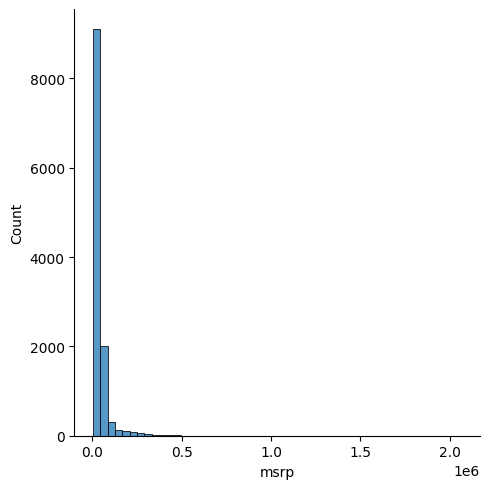

In [7]:
plt.figure(figsize=(15, 8))
sns.displot(df.msrp, bins=50)

<Figure size 1500x800 with 0 Axes>

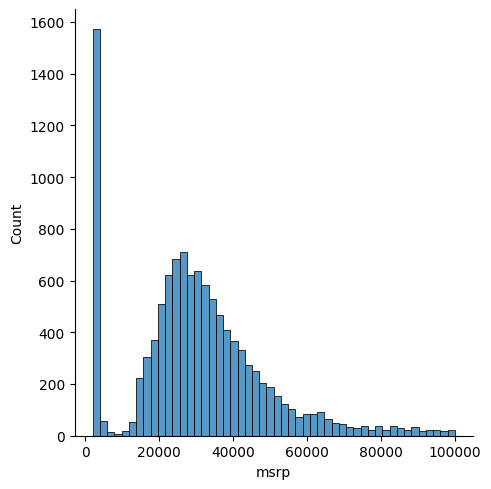

In [8]:
plt.figure(figsize=(15, 8))
sns.displot(df.msrp[df.msrp < 100000], bins=50)

### Missing Values

In [9]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## **Setting up the validation framework**

In [10]:
len(df)

11914

In [11]:
def trainValidateTest_Shuffle(df: pd.DataFrame, partitions: float, seed: np.integer):
    """
        This is a function use for splitting dataset into train, validation, and test.
        Train: 
        Validation: 
        Test: 
    """
    
    n = len(df)
    n_val = int(n * partitions)
    n_test = int(n * partitions)
    n_train = n - n_val - n_test
    
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    return df_train, df_val, df_test

In [12]:
help(np.random.shuffle)

Help on method shuffle in module numpy.random:

shuffle(x) method of numpy.random.mtrand.RandomState instance
    shuffle(x)

    Modify a sequence in-place by shuffling its contents.

    This function only shuffles the array along the first axis of a
    multi-dimensional array. The order of sub-arrays is changed but
    their contents remains the same.

    .. note::
        New code should use the `~numpy.random.Generator.shuffle`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    x : ndarray or MutableSequence
        The array, list or mutable sequence to be shuffled.

    Returns
    -------
    None

    See Also
    --------
    random.Generator.shuffle: which should be used for new code.

    Examples
    --------
    >>> arr = np.arange(10)
    >>> np.random.shuffle(arr)
    >>> arr
    [1 7 5 2 9 4 3 6 0 8] # random

    Multi-dimensional arrays are only shuffled along the firs

In [13]:
df_train, df_val, df_test = trainValidateTest_Shuffle(df=df, partitions=0.2, seed=2)
len(df_train), len(df_val), len(df_test)


(7150, 2382, 2382)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [15]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [16]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [17]:
len(y_train)

7150

## **Linear Regression**

In [18]:
df_train.iloc[10]

make                                 Rolls-Royce
model                     Phantom Drophead Coupe
year                                        2015
engine_fuel_type     premium unleaded (required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      AUTOMATIC
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category        Exotic,Luxury,Performance
vehicle_size                               Large
vehicle_style                        Convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [19]:
xi = [453.0, 11, 86]

w0 = 7.17
w = [0.01, 0.04, 0.002]

In [20]:
def linear_regression(x_i):
    n = len(x_i)

    pred = w0
    
    for j in range(n):
        pred = pred + (w[j] * x_i[j])
        
    return pred

In [21]:
linear_regression(xi)

12.312

In [22]:
np.expm1(12.312) # Do the exponent to reverse the logarithmic value

np.float64(222347.2221101062)

In [23]:
np.log1p(222347.2221101062)

np.float64(12.312)

## **Linear Regression Vector Form**

In [24]:
w = [0.01, 0.04, 0.002]

def dot(x_i, w):
    n = len(x_i)

    res = 0.0

    for j in range(n):
        res = res + x_i[j] * w[j]

    return res

In [25]:
def linear_regression(x_i: np.array):
    # Alternative to numpy's dot product 
    return w0 + dot(x_i, w)

In [26]:
w_new = [w0] + w

In [27]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [28]:
def linear_regression(x_i):
    x_i = [1] + x_i

    return dot(x_i, w_new)

In [29]:
linear_regression(xi)

12.312

In [30]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [31]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [32]:
def linear_regression(X):
    return X.dot(w_new)

In [33]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## **Training a Linear Regression Model**

In [34]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [35]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [36]:
def trainingLinearRegression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1) # This is an example of the approximated matrix

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w_sub = w_full[1:]
    
    return w0, w_sub

In [37]:
trainingLinearRegression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## **Baseline Model for Car Price Prediction**

In [38]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [39]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [40]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [41]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [42]:
w0, w = trainingLinearRegression(X_train, y_train)

In [43]:
w0

np.float64(7.927257388069986)

In [44]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [45]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

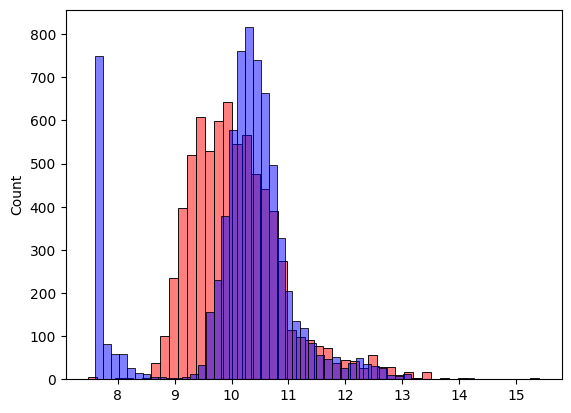

In [46]:
sns.histplot(y_pred, color='red', alpha=.5, bins=50)
sns.histplot(y_train, color='blue', alpha=.5, bins=50)

## **Root Mean Squared Error**

In [47]:
def RMSE(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [48]:
RMSE(y_train, y_pred)

np.float64(0.7554192603920132)

## **Computing RMSE on Validation Data**

In [49]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


In [50]:
def prepareX(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [51]:
X_train = prepareX(df_train)
w0, w = trainingLinearRegression(X_train, y_train)

X_val = prepareX(df_val)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.761653099130156)

## **Feature Engineering**

In [52]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [53]:
def prepareX(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [54]:
X_train = prepareX(df_train)
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [55]:
w0, w = trainingLinearRegression(X_train, y_train)

X_val = prepareX(df_val)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

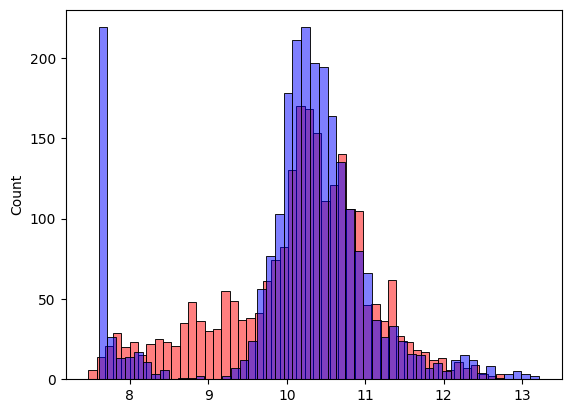

In [56]:
sns.histplot(y_pred, color='red', alpha=.5, bins=50)
sns.histplot(y_val, color='blue', alpha=.5, bins=50)

## **Categorical Variables**

In [57]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [58]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [59]:
categories = {}
for variable in categorical_variables:
    categories[variable] = list(df[variable].value_counts().index)

categories

{'make': ['Chevrolet',
  'Ford',
  'Volkswagen',
  'Toyota',
  'Dodge',
  'Nissan',
  'GMC',
  'Honda',
  'Mazda',
  'Cadillac',
  'Mercedes-Benz',
  'Suzuki',
  'BMW',
  'Infiniti',
  'Audi',
  'Hyundai',
  'Volvo',
  'Subaru',
  'Acura',
  'Kia',
  'Mitsubishi',
  'Lexus',
  'Buick',
  'Chrysler',
  'Pontiac',
  'Lincoln',
  'Oldsmobile',
  'Land Rover',
  'Porsche',
  'Saab',
  'Aston Martin',
  'Plymouth',
  'Bentley',
  'Ferrari',
  'FIAT',
  'Scion',
  'Maserati',
  'Lamborghini',
  'Rolls-Royce',
  'Lotus',
  'Tesla',
  'HUMMER',
  'Maybach',
  'Alfa Romeo',
  'McLaren',
  'Spyker',
  'Genesis',
  'Bugatti'],
 'engine_fuel_type': ['regular unleaded',
  'premium unleaded (required)',
  'premium unleaded (recommended)',
  'flex-fuel (unleaded/E85)',
  'diesel',
  'electric',
  'flex-fuel (premium unleaded required/E85)',
  'flex-fuel (premium unleaded recommended/E85)',
  'flex-fuel (unleaded/natural gas)',
  'natural gas'],
 'transmission_type': ['AUTOMATIC',
  'MANUAL',
  'AUTOM

In [60]:
def prepareX(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype("int")
        features.append('num_doors_%s' % v)

    for category, values in categories.items():
        for value in values:
            df['%s_%s' % (category, value)] = (df[category] == value).astype('int')
            features.append('%s_%s' % (category, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [61]:
X_train = prepareX(df_train)
X_train

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   0.,   0.,   0.]], shape=(7150, 166))

In [62]:
def trainingLinearRegression_Pseudoinverse(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    try:
        XTX_inv = np.linalg.inv(XTX)
    except np.linalg.LinAlgError:
        XTX_inv = np.linalg.pinv(XTX)
    
    XTX.dot(XTX_inv).round(1)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w_sub = w_full[1:]
    
    return w0, w_sub

In [63]:
w0, w = trainingLinearRegression_Pseudoinverse(X_train, y_train)

X_val = prepareX(df_val)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.407738582964561)

<Axes: ylabel='Count'>

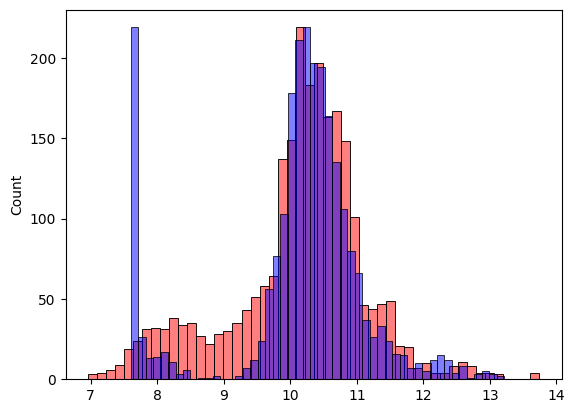

In [64]:
sns.histplot(y_pred, color='red', alpha=.5, bins=50)
sns.histplot(y_val, color='blue', alpha=.5, bins=50)

## **Regularization**

In [65]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [66]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [67]:
try:
    np.linalg.inv(XTX)
except np.linalg.LinAlgError as e:
    print(f"LinAlgError: {e} | Occured due to you trying to inverse a Singular Matrix !!!")

LinAlgError: Singular matrix | Occured due to you trying to inverse a Singular Matrix !!!


For this reason, we modify the matrix X to handle this error by adding some decimals to its values.

In [68]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001]
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [69]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [70]:
try:
    XTX_inv = np.linalg.inv(XTX)
    print(XTX_inv)
except np.linalg.LinAlgError as e:
    print(f"LinAlgError: {e} | Occured due to you trying to inverse a Singular Matrix !!!")

[[ 3.92646538e-02 -1.54615164e+05  1.54615121e+05]
 [-1.54615170e+05  3.51843724e+13 -3.51843721e+13]
 [ 1.54615129e+05 -3.51843721e+13  3.51843718e+13]]


In [71]:
y = [1, 2, 3, 1, 2, 3]

In [72]:
XTX_inv.dot(X.T).dot(y)

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

In [73]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [74]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [75]:
XTX = XTX + 0.01 * np.eye(3)
XTX

array([[1.01     , 2.       , 2.       ],
       [2.       , 1.01     , 1.0000001],
       [2.       , 1.0000001, 1.01     ]])

In [76]:
def trainingLinearRegression_Regularization(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w_sub = w_full[1:]
    
    return w0, w_sub

In [77]:
w0, w = trainingLinearRegression_Regularization(X_train, y_train)

X_val = prepareX(df_val)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.40773024732993385)

## **Tuning the Model**

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepareX(df_train)
    
    try:
        w0, w = trainingLinearRegression_Regularization(X_train, y_train, r=r)
    except np.linalg.LinAlgError:
        w0, w = trainingLinearRegression_Regularization(X_train, y_train)
    
    X_val = prepareX(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse = RMSE(y_val, y_pred)
    
    print(r, w0, rmse)

0.0 5.894168262690854 0.40773024732993385
1e-05 5.1366740056158475 0.4077384869512736
0.0001 5.892762477794779 0.40773774233963334
0.001 5.894168262690854 0.40773024732993385
0.1 5.712974200207929 0.40722082513901264
1 5.11812369029826 0.40729356371019776
10 3.9397594308346924 0.425900572474619


In [80]:
# Best regularization parameter
r = 0.1
X_train = prepareX(df_train)
w0, w = trainingLinearRegression_Regularization(X_train, y_train, r=r)

X_val = prepareX(df_val)
y_pred = w0 + X_val.dot(w)
rmse = RMSE(y_val, y_pred)
rmse

np.float64(0.40722082513901264)

## **Using the Model**

In [83]:
# Instead of training the model on just training dataset,
# we train on the entire train & validation dataset as well

dfFull_train = pd.concat([df_train, df_val]).reset_index(drop=True)
dfFull_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385
1,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031
2,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640
3,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873
4,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,Volvo,V60,2015,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Wagon,37,25,870
9528,Maserati,GranTurismo Convertible,2015,premium unleaded (required),444.0,8.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Midsize,Convertible,20,13,238
9529,Cadillac,Escalade Hybrid,2013,regular unleaded,332.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Hybrid",Large,4dr SUV,23,20,1624
9530,Mitsubishi,Lancer,2016,regular unleaded,148.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,34,24,436


In [85]:
yFull_train = np.concatenate([y_train, y_val])
yFull_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [86]:
X_fullTrain = prepareX(dfFull_train)
X_fullTrain

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 166))

In [ ]:
w0, w = trainingLinearRegression_Regularization(X_fullTrain, yFull_train, r=0.001)
w0, w

(np.float64(5.850990643804957),
 array([ 5.45353715e-04,  6.59319816e-02, -3.88802098e-03, -2.91892689e-02,
         1.13820226e-04, -1.02380436e-01, -1.49963356e-01, -6.45433925e-02,
         1.02568815e-01,  2.08545264e-02, -4.81492918e-01,  7.35474349e-02,
        -1.79613957e-01, -8.31802321e-02, -2.63323256e-01,  1.81960802e-01,
        -1.07468569e-01,  1.63672006e-01,  5.07798433e-02, -2.02529190e-01,
         3.08256903e-01, -4.47967135e-01,  8.41018626e-02, -3.75021897e-01,
        -8.07039717e-02, -1.42659891e-01, -1.37667475e-02,  4.62607016e-02,
        -1.86496012e-01,  1.23450791e-01,  3.76278733e-03,  7.48084686e-02,
         4.53067306e-02,  3.90087605e-01,  2.24785725e-01,  1.04431107e-03,
         2.36749116e-01,  9.46323302e-02, -1.91176930e-02,  7.12335859e-01,
        -4.67066166e-01, -4.75585569e-01,  1.18399437e+00, -2.76428505e-01,
         4.88679267e-02, -1.00077761e+00,  9.12608261e-01, -5.48743121e-01,
         7.36910392e-01,  1.51160727e-01,  4.33144630e-0

In [89]:
X_test = prepareX(df_test)
y_pred = w0 + X_test.dot(w)
rmse = RMSE(y_test, y_pred)
rmse

np.float64(0.39584737348220955)

In [93]:
car = df_test.iloc[20].to_dict()
car

{'make': 'Toyota',
 'model': 'Sienna',
 'year': 2015,
 'engine_fuel_type': 'regular unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'driven_wheels': 'front wheel drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'Large',
 'vehicle_style': 'Passenger Minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [94]:
df_sample = pd.DataFrame([car])
df_sample

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,Toyota,Sienna,2015,regular unleaded,266.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Large,Passenger Minivan,25,18,2031


In [95]:
X_sample = prepareX(df_sample)
X_sample

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [96]:
y_pred = w0 + X_sample.dot(w)
y_pred

array([10.56241246])

In [98]:
np.expm1(y_pred)

array([38653.2675789])

In [100]:
np.expm1(y_test[20])

np.float64(35000.00000000001)

## **Car Price Prediction Project Summary**